In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
!pip install wordcloud

In [4]:
data = pd.read_csv("C:/Users/suman/Downloads/rusk/filename.csv")
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1575658826606718976,1575655436531175424,2022-09-30 01:28:33 UTC,2022-09-30,01:28:33,0,1545895554122715137,karen_malano,karen malano,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'UnpaintedMelody', 'name': 'M...",NaN,NaN,NaN,NaN
1,1575658826489294849,1575181576002207744,2022-09-30 01:28:33 UTC,2022-09-30,01:28:33,0,991849053741879296,docdanguitarman,docdan,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CaptUnbalanced', 'name': 'Fe...",NaN,NaN,NaN,NaN
2,1575658824555323392,1575658824555323392,2022-09-30 01:28:32 UTC,2022-09-30,01:28:32,0,4899875641,feather043,Dan Dail,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1575658818356547584,1575658818356547584,2022-09-30 01:28:31 UTC,2022-09-30,01:28:31,0,1216495237763411968,news_world_tech,🌊 Daniel Nova 🌊,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1575658815370166277,1575568333239246848,2022-09-30 01:28:30 UTC,2022-09-30,01:28:30,0,1696999140,anno0770,Anno0770,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RichardGS1079', 'name': 'Ric...",NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [6]:
data1 = data[["username", "tweet", "language"]]

In [7]:
data1.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [8]:
data1["language"].value_counts()

en     8986
pt      298
qme     152
it       89
in       78
ru       73
es       65
ja       40
und      34
zh       16
de       16
ca       16
qht      15
qam      15
pl       12
uk       12
zxx      11
tl        9
ar        8
fi        8
th        7
fr        7
ro        7
nl        6
hi        4
fa        4
cs        4
ur        4
tr        3
vi        3
da        2
ml        2
cy        2
te        1
ta        1
et        1
am        1
ht        1
qst       1
hu        1
no        1
ko        1
lt        1
Name: language, dtype: int64

In [9]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data1["tweet"] = data1["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
<ipython-input-9-0633193d9c14>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["tweet"] = data1["tweet"].apply(clean)


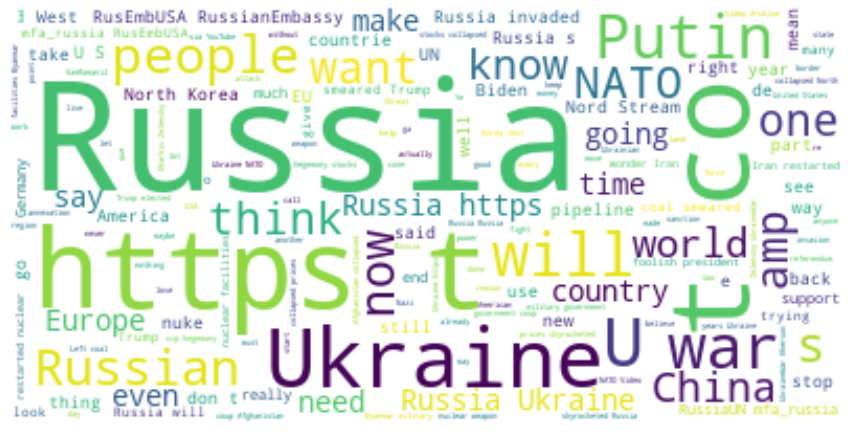

In [10]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data1["tweet"]]
data1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data1["tweet"]]
data1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data1["tweet"]]
data1 = data1[["tweet", "Positive", "Negative", "Neutral"]]
print(data1.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\suman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0  unpaintedmelodi cant pack shit famili fedex ru...     0.328     0.000   
1  captunbalanc  jamesgrickard make sens would wo...     0.000     0.183   
2  presid biden deal economi left ruin predecesso...     0.000     0.353   
3  russia ukrain putin russian russianmobil ukrai...     0.000     0.130   
4   correct winter  autumn   discuss mess evid kn...     0.000     0.375   

   Neutral  
0    0.672  
1    0.817  
2    0.647  
3    0.870  
4    0.625  


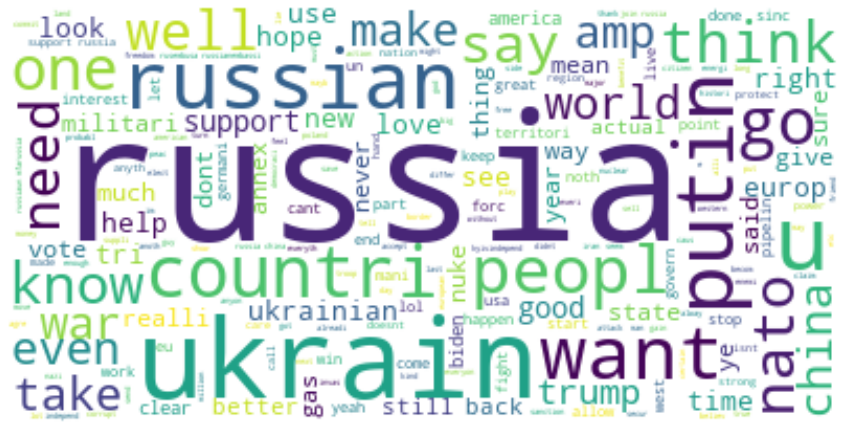

In [14]:
positive =' '.join([i for i in data1['tweet'][data1['Positive'] > data1["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

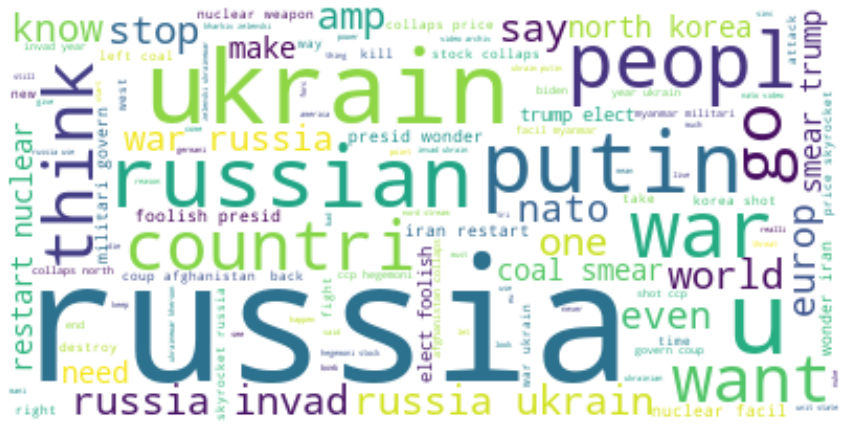

In [15]:
negative =' '.join([i for i in data1['tweet'][data1['Negative'] > data1["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()